In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from hilde.trajectory import reader
from hilde.green_kubo.heat_flux import get_kappa, get_heat_flux_aurocorrelation

%matplotlib inline

In [2]:
import seaborn as sns
sns.set_context('paper', font_scale=1.8)

## Create `heat_flux.nc`
Run
```bash
➤ hilde output md CsPbBr_300K.son -hf -d 200
```

In [3]:
# read the heat flux data.set
DS = xr.load_dataset('heat_flux.nc')

In [4]:
ds = get_kappa(DS, delta='auto')
ds

[GreenKubo]    Compute Prefactor:
[GreenKubo]    .. Volume:          6528.92  AA^3
[GreenKubo]    .. Temperature:      309.62  K
[GreenKubo]    -> Prefactor:       1266.15  W/mK / (eV/AA^/ps)
[GreenKubo]    Integrate heat flux autocorrelation function cumulatively
[GreenKubo]    .. Integrator:   `scipy.integrate.cumtrapz`
[GreenKubo]    Pre-est. correlation time (drop below 1/e):      75.00 fs
[GreenKubo]    .. use 4 data points to fit exponential
[GreenKubo]    .. estimated correlation time:                   62.38 fs
[GreenKubo]    -> choose delta of size:                    3 data points
-> avalanche time with max. F of  1:            100.00 fs


<xarray.Dataset>
Dimensions:  (a: 3, b: 3, time: 471)
Coordinates:
  * time     (time) float64 0.0 25.0 50.0 75.0 ... 1.17e+04 1.172e+04 1.175e+04
Dimensions without coordinates: a, b
Data variables:
    Jcorr    (time, a, b) float64 0.01056 0.0003882 0.0006293 ... 0.0 0.0 0.0
    kappa    (time, a, b) float64 0.0 0.0 0.0 0.0 ... -0.02001 0.302 0.07294
Attributes:
    gk_prefactor:  1266.1450577294136
    t_avalanche:   100.0

In [5]:
j = pd.DataFrame({
    'j1': ds.Jcorr[:, 0, 0], 
    'j2': ds.Jcorr[:, 1, 1],
    'j3': ds.Jcorr[:, 2, 2]}, index=ds.time)

k = np.trace(ds.kappa, axis1=1, axis2=2) / 3
k = pd.Series(k, index=ds.time)

0.3401563148255578

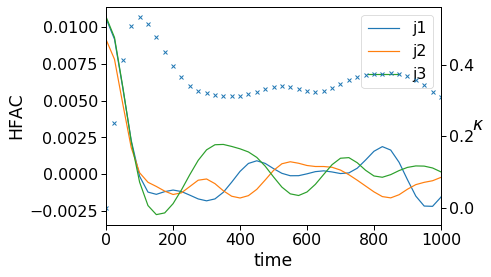

In [6]:
#plot

ax1 = j.plot()
ax1.set_ylabel('HFAC')

ax2 = ax1.twinx()
k.plot(ax=ax2, style='x')
ax2.set_ylabel(r'$\kappa$', rotation=0)

# x = np.asarray(j.index)
# ax1.plot(x, 0.03 * np.exp(- x / 62))


ax1.set_xlim([0, 1000])

k.iloc[10]